In [ ]:
import pandas as pd
import numpy as np
from datetime import date
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# importing csv file
file_path = "used_cars_data.csv"
df = pd.read_csv(file_path, index_col=0) # index_col is used to delete a col with the specified index


In [13]:
# analysing our dataframe
print(df.shape)
print(df.head(20))
print(df.info())
print(df.describe())

(7253, 13)
                                                   Name    Location  Year  \
S.No.                                                                       
0                                Maruti Wagon R LXI CNG      Mumbai  2010   
1                      Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2                                          Honda Jazz V     Chennai  2011   
3                                     Maruti Ertiga VDI     Chennai  2012   
4                       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
5                       Hyundai EON LPG Era Plus Option   Hyderabad  2012   
6                                Nissan Micra Diesel XV      Jaipur  2013   
7                     Toyota Innova Crysta 2.8 GX AT 8S      Mumbai  2016   
8                   Volkswagen Vento Diesel Comfortline        Pune  2013   
9                        Tata Indica Vista Quadrajet LS     Chennai  2012   
10                                     Maruti Ciaz Zeta       Koc

In [ ]:
# checking for duplicates
print(df.nunique())
print(df.isnull().sum())
print(df.count())
print(df['Transmission'].value_counts())
print(df.head())

Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
Car_Age                23
dtype: int64
        Name  Location   Year  Kilometers_Driven  Fuel_Type  Transmission  \
S.No.                                                                       
0      False     False  False              False      False         False   
1      False     False  False              False      False         False   
2      False     False  False              False      False         False   
3      False     False  False              False      False         False   
4      False     False  False              False      False         False   
...      ...       ...    ...                ...        ...           ...   
7248   

In [12]:
# removing unwanted columns
df.drop(['New_Price'],axis=1,inplace=True)
print(df.shape)

(7253, 13)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 793.3+ KB


In [16]:
# droping duplicates
print(df.nunique())
df_clean = df.drop_duplicates()
print(df_clean.shape)

Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
Price                1373
Car_Age                23
dtype: int64
(7252, 13)


In [7]:
# Imputation Techniques
# Feature engineering
df['Car_Age'] = date.today().year - df['Year']
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
 13  Car_Age            7253 non-null   int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 850.0+ KB
None


In [10]:
#Label encoding 
Owner_Type_data = df['Owner_Type']
label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(Owner_Type_data)
df['Owner_Type'] = encoded_data
print(df['Owner_Type'].value_counts())

Owner_Type
0    5952
2    1152
3     137
1      12
Name: count, dtype: int64


In [24]:
# One hot encoding

one_hot_encoded_data = pd.get_dummies(df, columns=['Transmission'], prefix='transmission')
encoded_columns = [col for col in one_hot_encoded_data.columns if 'transmission'in col]
one_hot_encoded_data[encoded_columns] = one_hot_encoded_data[encoded_columns].astype(int)
one_hot_encoded_data.head()



,Name,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,transmission_Automatic,transmission_Manual
S.No.,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,949,2010,72000,62,0,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,0,1
1,Hyundai Creta 1.6 CRDi SX Option,765,2015,41000,3852,0,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,0,1
2,Honda Jazz V,591,2011,46000,3325,0,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0,1
3,Maruti Ertiga VDI,591,2012,87000,3852,0,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,0,1
4,Audi A4 New 2.0 TDI Multitronic,772,2013,40670,3852,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1,0


In [7]:
df.drop(['Power', 'Engine', 'Mileage'], axis=1, inplace=True)

In [12]:
#Frequency encoding

freq_location = df['Location'].value_counts()
freq_fuelt = df['Fuel_Type'].value_counts()

df['Location'] = df['Location'].map(freq_location)
df['Fuel_Type'] = df['Fuel_Type'].map(freq_fuelt)

print(df.head())

                                   Name  Location  Year  Kilometers_Driven  \
S.No.                                                                        
0                Maruti Wagon R LXI CNG       949  2010              72000   
1      Hyundai Creta 1.6 CRDi SX Option       765  2015              41000   
2                          Honda Jazz V       591  2011              46000   
3                     Maruti Ertiga VDI       591  2012              87000   
4       Audi A4 New 2.0 TDI Multitronic       772  2013              40670   

       Fuel_Type Transmission  Owner_Type     Mileage   Engine      Power  \
S.No.                                                                       
0             62       Manual           0  26.6 km/kg   998 CC  58.16 bhp   
1           3852       Manual           0  19.67 kmpl  1582 CC  126.2 bhp   
2           3325       Manual           0   18.2 kmpl  1199 CC   88.7 bhp   
3           3852       Manual           0  20.77 kmpl  1248 CC  88.7

In [12]:
############################################## DATA VISUALIZATION #################################################

Text(0, 0.5, 'Frequency')

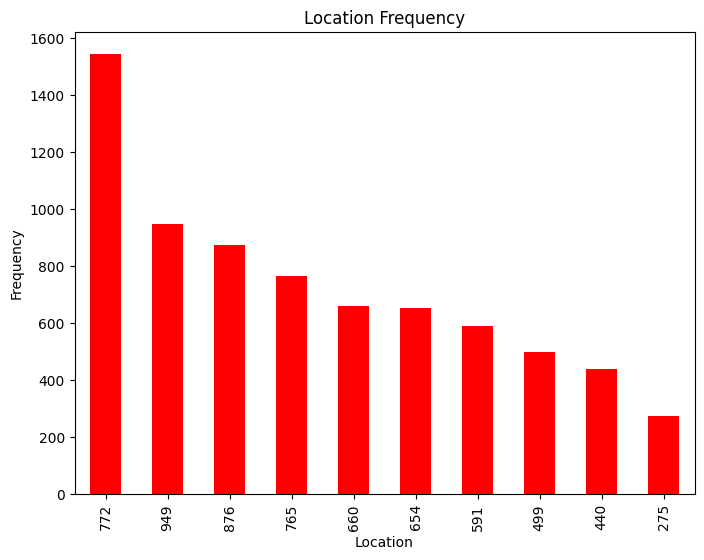

In [ ]:
# Bar plot

df['Location'].value_counts().plot(kind='bar', figsize=(8, 6), color='red')
plt.title('Location Frequency')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()

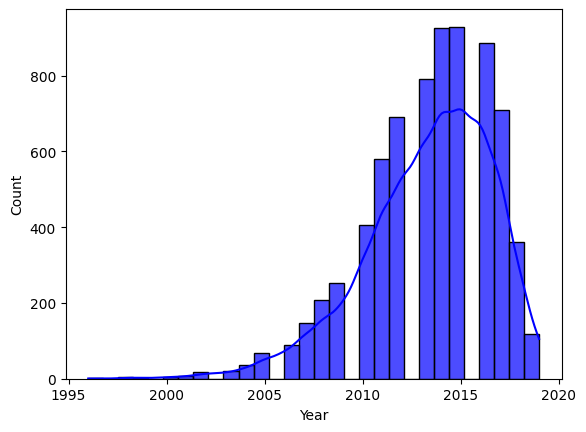

In [59]:
# Hist plot

sns.histplot(data = df['Year'] ,bins=30, alpha=0.7, color='blue', kde=True)
plt.show()


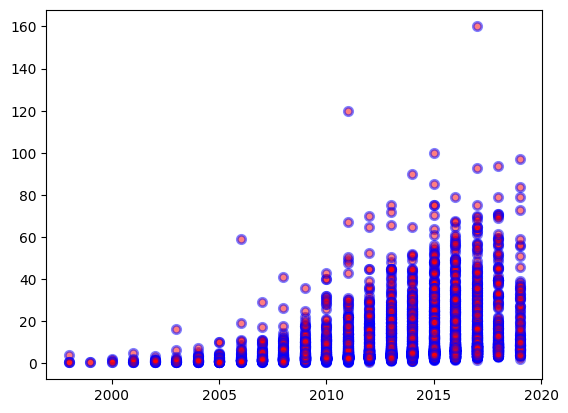

In [ ]:
# Scatter plot of selling

x = df["Year"]
y= df["Price"]

plt.scatter(x,y,color='red',alpha=0.5,edgecolor='b',linewidth=2)
plt.show()

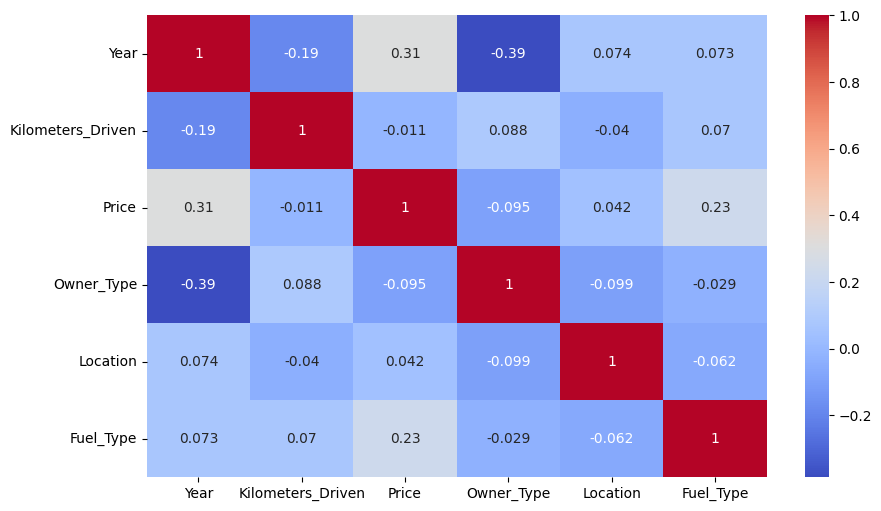

In [58]:
# Heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df[['Year', 'Kilometers_Driven', 'Price', 'Owner_Type', 'Location', 'Fuel_Type']].corr(), annot=True, cmap='coolwarm')
plt.show()


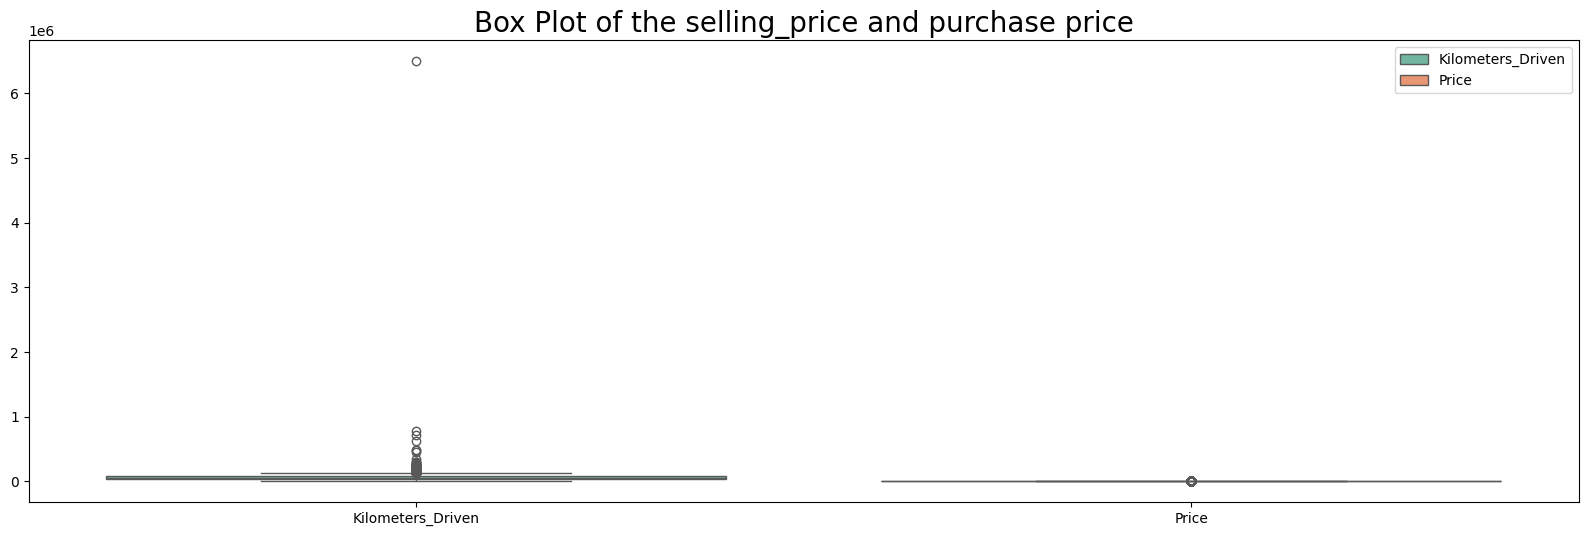

In [40]:
# Boxplot

plt.figure(figsize=(20, 6))
sns.boxplot(data=df[["Kilometers_Driven","Price"]],palette='Set2',legend=True)
plt.title('Box Plot of the selling_price and purchase price',fontsize=20)
plt.show()

<Axes: >

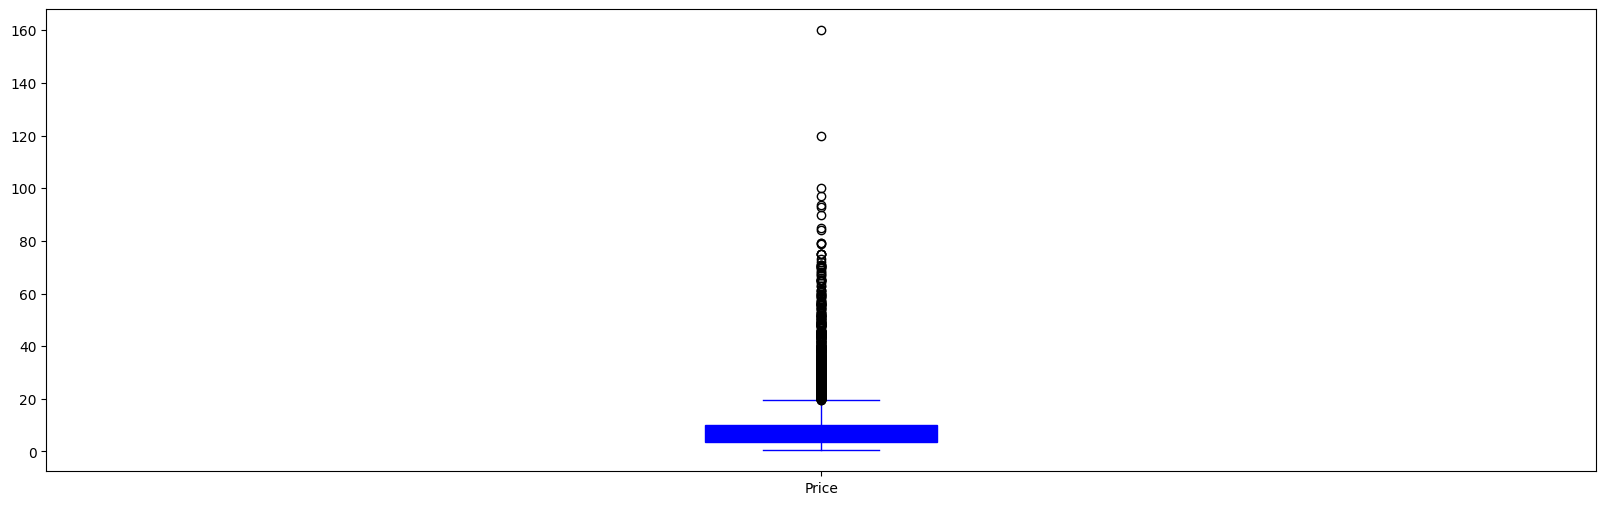

In [66]:
# Boxplot with .plot

df['Price'].plot(kind='box',figsize=(20, 6),color='blue',patch_artist=True)

/tmp/ipykernel_49294/3893192071.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


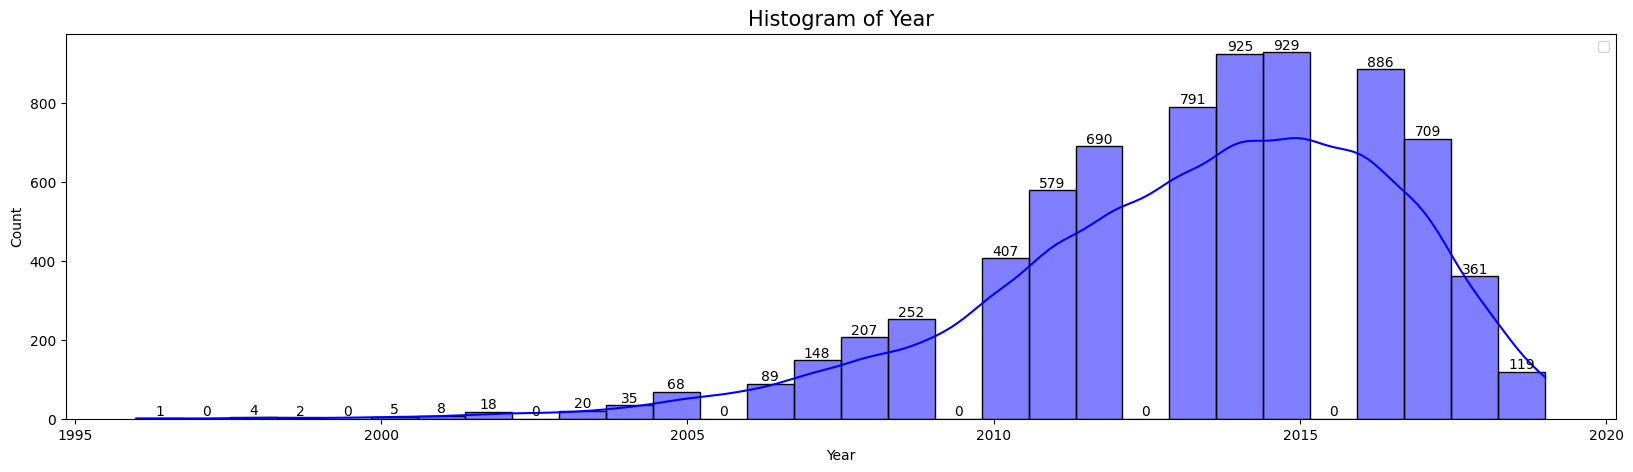

In [54]:
plt.figure(figsize=(20, 5))
sns.histplot(df['Year'], kde=True, color='blue', bins=30)

ax = plt.gca()

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., height,f'{height}', ha='center', va='bottom')
plt.title("Histogram of Year", fontsize=15)
plt.legend()
plt.show() 


Number of bins: 13


<Axes: xlabel='Year', ylabel='Count'>

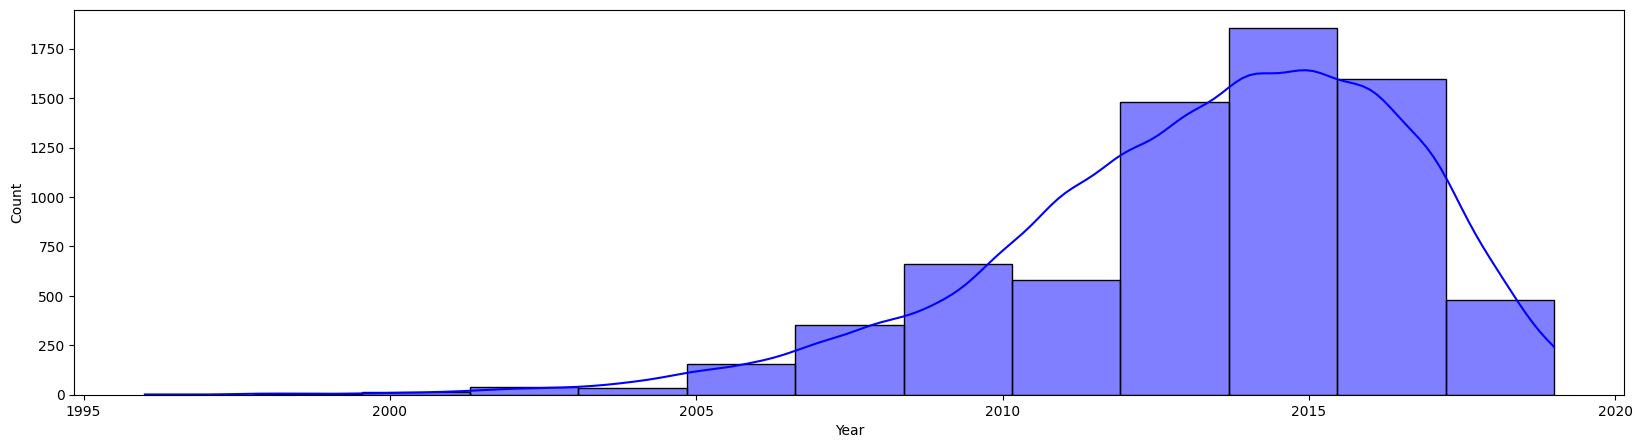

In [ ]:
N = len(df['Year'])
bins = int(1 + np.log2(N))  # Sturges' rule
plt.figure(figsize=(20, 5))
sns.histplot(df['Year'], kde=True, color='blue', bins=bins)

In [67]:
# Train model

target_column = 'Price'
input_data = df.drop(df['Price'], axis=1)
output_data = df[target_column]

# Splitting the data

input_train, input_test, output_train, output_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)


KeyError: '[1.75, 12.5, 4.5, 6.0, 17.74, 2.35, 3.5, 17.5, 5.2, 1.95, 9.95, 4.49, 5.6, 27.0, 17.5, 15.0, 5.4, 5.99, 6.34, 28.0, 18.55, 8.25, 23.5, 1.87, 2.85, 4.25, 4.25, 2.75, 9.9, 4.0, 7.75, 6.75, 12.5, 11.5, 6.98, 1.85, 8.63, 4.85, 28.0, 5.0, 1.25, 1.53, 5.58, 4.74, 8.85, 10.11, 4.25, 10.95, 3.85, 5.5, 21.43, 4.25, 3.3, 3.85, 3.6, 3.99, 3.3, 2.07, 7.75, 2.25, 16.5, 2.75, 26.7, 10.0, 2.5, 13.5, 1.85, 35.67, 8.15, 10.5, 14.5, 9.65, 3.48, 6.92, 6.46, 29.5, 2.0, 4.5, 11.75, 1.3, 3.75, 4.5, 4.82, 2.8, 3.11, 3.25, 13.9, 2.25, 5.75, 2.1, 5.0, 16.5, 39.58, 5.5, 8.1, 3.5, 2.79, 3.45, 4.45, 2.65, 3.8, 4.65, 3.95, 9.8, 2.7, 2.41, 3.9, 24.0, 5.75, 5.25, 19.25, 3.91, 2.15, 20.75, 3.35, 11.11, 20.0, 6.55, 7.0, 7.5, 0.85, 16.75, 10.95, 2.45, 3.23, 7.75, 9.35, 3.25, 5.25, 7.25, 7.47, 13.25, 5.81, 2.6, 54.0, 11.5, 1.6, 17.22, 6.0, 3.95, 17.95, 3.7, 5.43, 1.67, 13.49, 2.85, 4.75, 9.9, 37.0, 26.5, 23.32, 6.25, 30.0, 9.86, 8.5, 4.23, 3.5, 2.5, 2.39, 11.25, 7.11, 10.9, 6.2, 7.9, 4.42, 13.5, 6.25, 2.1, 45.0, 33.66, 3.65, 2.75, 42.5, 6.5, 19.0, 4.45, 23.0, 8.35, 22.95, 1.5, 6.89, 1.45, 33.5, 1.25, 4.2, 6.75, 32.0, 7.5, 4.6, 4.04, 10.31, 55.76, 2.6, 8.5, 2.95, 3.5, 3.55, 3.25, 4.5, 5.35, 6.5, 9.0, 6.0, 2.75, 1.5, 19.9, 10.0, 3.0, 2.11, 11.96, 3.25, 4.75, 5.95, 8.15, 4.22, 10.5, 45.0, 2.9, 8.9, 26.0, 8.22, 3.5, 1.25, 3.7, 39.41, 2.65, 8.92, 4.1, 35.67, 3.6, 0.85, 3.32, 3.6, 6.8, 2.5, 19.64, 7.0, 3.87, 6.27, 18.12, 2.65, 7.2, 14.3, 6.9, 10.75, 0.95, 8.09, 18.5, 4.75, 8.45, 3.5, 1.8, 3.7, 7.17, 1.75, 21.99, 18.65, 1.85, 5.95, 3.75, 3.75, 2.6, 1.75, 2.8, 61.29, 18.0, 4.35, 13.75, 2.0, 10.0, 1.65, 45.77, 3.25, 12.8, 0.55, 7.15, 7.0, 3.75, 8.5, 4.35, 3.26, 4.21, 70.36, 2.95, 4.28, 3.57, 3.11, 5.96, 4.7, 6.9, 5.25, 28.0, 1.35, 4.85, 6.7, 3.1, 18.64, 2.8, 20.25, 26.78, 8.26, 3.89, 2.1, 12.69, 2.58, 20.77, 20.26, 1.5, 2.5, 4.25, 57.0, 44.0, 3.65, 2.05, 3.13, 1.5, 2.85, 2.65, 10.6, 1.25, 8.25, 4.45, 3.7, 2.8, 1.8, 21.95, 49.0, 62.67, 1.4, 5.5, 2.95, 6.86, 6.15, 3.3, 2.55, 1.5, 2.5, 1.4, 3.4, 2.25, 7.5, 2.8, 7.66, 7.15, 3.5, 3.5, 3.45, 3.55, 25.99, 5.25, 2.9, 2.05, 3.75, 6.75, 0.95, 52.0, 3.91, 27.3, 2.7, 3.5, 6.2, 2.75, 3.25, 3.25, 0.65, 35.0, 3.25, 2.9, 2.9, 17.75, 8.25, 5.77, 9.49, 12.95, 20.0, 1.0, 7.1, 16.5, 26.0, 3.2, 9.48, 4.0, 26.5, 11.77, 37.0, 8.75, 1.95, 3.75, 2.5, 34.5, 4.65, 32.0, 62.81, 3.25, 3.1, 3.91, 11.0, 3.5, 16.5, 30.0, 28.0, 28.0, 0.92, 2.75, 53.83, 4.95, 33.5, 27.95, 7.25, 25.71, 29.67, 19.0, 13.05, 25.5, 8.5, 7.25, 0.8, 6.9, 70.99, 2.25, 5.5, 4.35, 2.25, 24.5, 5.45, 12.03, 8.5, 28.5, 1.2, 5.75, 3.2, 9.89, 6.58, 4.06, 13.37, 25.82, 3.74, 22.0, 1.45, 2.0, 4.7, 3.75, 7.7, 3.35, 2.6, 13.77, 7.1, 2.65, 2.5, 7.53, 7.98, 39.0, 2.25, 3.85, 13.5, 3.5, 8.92, 20.37, 36.5, 48.91, 7.2, 5.99, 5.25, 6.5, 4.4, 4.6, 2.95, 3.26, 2.22, 10.5, 8.26, 14.45, 2.5, 51.43, 23.0, 5.5, 4.5, 6.8, 8.75, 7.0, 33.5, 2.25, 4.24, 28.42, 2.75, 3.0, 3.55, 4.8, 13.5, 56.0, 3.99, 15.5, 2.32, 18.58, 5.5, 3.2, 4.0, 1.6, 4.15, 4.25, 2.6, 3.43, 2.55, 32.0, 6.25, 3.6, 18.5, 4.25, 4.8, 13.0, 2.25, 2.3, 13.56, 12.25, 3.76, 8.58, 27.5, 4.95, 3.3, 8.0, 2.79, 45.64, 2.55, 1.0, 37.56, 9.29, 6.37, 2.98, 5.75, 13.0, 6.8, 10.49, 5.6, 2.85, 8.36, 1.0, 10.75, 3.85, 3.0, 9.6, 13.25, 5.75, 6.75, 4.85, 38.99, 2.85, 9.51, 18.5, 6.75, 29.4, 3.29, 9.5, 2.2, 6.5, 4.9, 6.75, 3.8, 29.5, 10.5, 6.2, 5.0, 2.3, 17.0, 25.5, 5.65, 5.6, 29.98, 7.39, 19.0, 5.0, 3.35, 4.45, 8.31, 6.0, 5.25, 1.4, 12.3, 1.5, 8.12, 6.12, 10.88, 3.5, 6.15, 33.0, 13.5, 17.11, 29.77, 5.95, 5.75, 19.0, 4.75, 3.3, 16.5, 44.0, 4.39, 6.2, 24.22, 5.45, 44.0, 24.82, 11.69, 20.0, 1.45, 48.5, 9.45, 12.5, 6.9, 5.8, 44.56, 8.5, 10.7, 12.0, 2.44, 1.95, 4.35, 17.5, 2.9, 2.9, 8.9, 16.75, 3.95, 2.1, 4.29, 3.85, 9.0, 4.5, 12.46, 4.65, 20.5, 2.9, 1.45, 0.65, 29.5, 25.0, 3.5, 11.25, 10.79, 5.9, 5.12, 5.7, 35.84, 1.25, 2.65, 9.19, 23.5, 12.5, 1.5, 0.8, 0.75, 8.1, 9.75, 37.93, 1.96, 20.5, 2.75, 75.0, 2.8, 9.25, 3.0, 23.89, 12.75, 4.15, 4.65, 8.9, 1.5, 3.27, 18.0, 6.3, 11.31, 6.16, 6.0, 5.43, 4.65, 7.5, 6.25, 9.25, 3.15, 2.3, 5.25, 7.4, 1.55, 6.0, 5.9, 4.7, 6.5, 3.55, 7.1, 6.0, 7.99, 4.1, 3.95, 4.38, 2.75, 55.54, 29.0, 6.6, 6.99, 18.75, 1.28, 1.2, 4.31, 16.5, 5.64, 31.12, 25.46, 7.88, 36.0, 30.0, 2.85, 3.5, 7.5, 19.0, 54.0, 4.7, 8.5, 17.0, 3.51, 19.5, 17.0, 43.35, 2.65, 3.52, 6.25, 24.75, 5.25, 11.0, 9.1, 3.25, 8.5, 3.1, 19.86, 4.9, 5.7, 1.75, 2.9, 7.83, 8.15, 2.0, 6.25, 3.4, 3.19, 7.75, 3.2, 4.9, 3.8, 4.0, 23.5, 1.15, 2.2, 26.5, 10.65, 35.68, 31.94, 4.2, 9.9, 15.46, 8.46, 3.25, 2.6, 5.2, 1.8, 1.6, 2.5, 2.5, 6.7, 1.2, 35.55, 7.75, 1.94, 2.2, 3.8, 15.65, 39.47, 1.5, 8.85, 17.9, 5.08, 6.25, 22.75, 1.46, 2.05, 4.08, 4.55, 14.0, 10.9, 2.45, 15.8, 8.25, 8.5, 15.54, 2.35, 4.32, 3.9, 5.2, 5.85, 6.25, 17.63, 9.75, 55.0, 4.1, 11.99, 13.54, 56.0, 6.5, 4.75, 5.6, 29.2, 6.35, 4.95, 8.5, 4.5, 5.5, 6.56, 2.3, 3.5, 4.55, 7.75, 5.25, 23.29, 23.99, 1.79, 13.9, 18.95, 2.49, 3.15, 6.45, 4.25, 2.75, 7.14, 2.44, 3.5, 7.3, 2.75, 8.2, 6.51, 4.25, 6.21, 4.58, 7.5, 2.1, 4.09, 10.75, 41.5, 4.4, 6.25, 10.5, 7.25, 3.2, 3.95, 12.07, 18.6, 5.7, 1.75, 10.99, 14.5, 3.11, 13.96, 7.11, 6.9, 7.77, 5.5, 5.35, 4.5, 4.75, 32.8, 0.7, 50.29, 10.99, 5.57, 5.9, 9.43, 2.9, 3.68, 21.67, 12.5, 19.92, 6.75, 6.96, 3.25, 8.65, 5.0, 5.5, 2.6, 3.41, 2.7, 5.5, 35.0, 9.75, 4.25, 3.2, 6.85, 4.5, 3.55, 1.9, 3.6, 21.8, 13.5, 2.66, 3.75, 32.0, 8.07, 5.64, 23.99, 7.5, 27.0, 2.85, 6.35, 3.3, 5.0, 6.46, 3.75, 1.52, 3.61, 43.74, 20.0, 3.0, 3.65, 5.25, 58.0, 8.65, 2.5, 7.75, 4.15, 10.85, 5.53, 11.5, 40.0, 9.25, 2.29, 7.0, 1.65, 8.25, 9.14, 6.5, 2.95, 5.75, 2.85, 2.1, 13.55, 20.5, 20.0, 59.72, 6.5, 7.5, 2.15, 8.44, 12.49, 5.48, 4.2, 7.2, 4.8, 5.83, 18.39, 5.85, 6.21, 3.65, 3.7, 30.0, 4.85, 6.93, 2.6, 1.89, 39.5, 10.0, 9.95, 9.45, 28.25, 1.8, 1.4, 7.25, 3.6, 1.2, 4.94, 1.25, 4.8, 31.15, 3.3, 2.4, 2.0, 3.1, 5.09, 1.05, 7.0, 2.5, 17.5, 2.1, 17.75, 1.45, 2.45, 13.8, 5.85, 8.9, 5.15, 16.56, 1.65, 16.0, 1.45, 8.08, 4.5, 4.3, 2.6, 4.45, 5.37, 1.75, 16.5, 19.0, 2.8, 6.2, 3.8, 6.1, 11.65, 4.15, 16.5, 4.3, 2.25, 6.75, 9.4, 5.39, 8.51, 1.85, 2.5, 4.75, 3.5, 5.5, 6.33, 2.47, 3.3, 3.5, 38.75, 7.99, 13.28, 9.5, 14.01, 6.99, 11.0, 11.0, 2.3, 26.5, 67.0, 17.75, 4.8, 4.57, 3.5, 7.61, 25.0, 5.88, 13.5, 4.6, 4.9, 5.25, 12.41, 3.8, 8.95, 7.2, 4.5, 4.15, 7.94, 7.25, 3.7, 2.45, 1.5, 12.0, 2.2, 3.6, 1.92, 20.5, 4.25, 3.2, 2.6, 3.85, 3.48, 4.55, 7.0, 5.75, 8.73, 1.7, 29.5, 10.49, 64.0, 7.55, 3.95, 3.25, 2.75, 7.35, 4.7, 8.77, 3.42, 2.5, 20.0, 5.25, 14.5, 3.45, 3.3, 51.0, 6.5, 3.65, 7.25, 6.01, 2.8, 4.0, 5.95, 9.2, 5.35, 12.0, 38.94, 2.69, 27.5, 2.75, 2.8, 6.45, 5.88, 4.65, 2.5, 51.35, 6.85, 5.25, 9.23, 22.0, 5.19, 4.35, 24.5, 5.75, 9.19, 10.75, 2.99, 3.89, 11.73, 3.11, 14.45, 8.7, 5.04, 8.5, 15.65, 5.65, 16.5, 2.0, 3.9, 14.5, 44.0, 5.0, 19.75, 11.44, 1.75, 5.6, 30.42, 9.57, 3.5, 10.46, 4.85, 5.68, 13.25, 16.0, 3.0, 0.99, 5.0, 4.75, 5.35, 5.98, 3.5, 4.77, 5.45, 6.85, 7.3, 1.25, 8.25, 2.71, 3.6, 3.0, 4.65, 9.5, 2.95, 3.0, 5.95, 4.0, 2.5, 11.37, 2.25, 3.1, 17.18, 6.5, 5.7, 8.0, 2.6, 2.45, 11.57, 2.3, 5.9, 7.2, 5.9, 6.0, 1.95, 6.55, 25.0, 2.65, 69.5, 14.0, 2.1, 20.4, 5.68, 5.55, 12.75, 3.35, 1.55, 5.9, 18.98, 11.51, 7.75, 13.9, 1.35, 38.0, 11.6, 12.25, 3.8, 3.25, 6.4, 3.95, 3.57, 1.25, 3.65, 12.5, 23.0, 1.35, 6.32, 3.4, 0.77, 0.9, 18.0, 19.0, 1.1, 2.0, 6.5, 9.45, 4.0, 32.25, 2.1, 9.75, 6.3, 21.0, 4.65, 17.0, 4.35, 14.82, 40.0, 6.15, 11.25, 32.0, 45.62, 6.24, 4.8, 4.5, 3.87, 2.75, 6.57, 2.0, 3.65, 6.95, 5.5, 7.0, 24.0, 11.0, 32.5, 6.45, 15.75, 5.5, 19.03, 15.25, 2.4, 2.3, 14.35, 3.5, 11.97, 1.6, 18.9, 5.4, 2.95, 5.1, 1.5, 4.9, 2.9, 1.15, 2.3, 5.99, 3.4, 1.7, 1.99, 2.5, 4.85, 2.65, 27.35, 6.9, 3.5, 12.5, 9.2, 4.9, 3.2, 5.55, 13.5, 2.6, 4.5, 34.0, 12.0, 5.25, 21.56, 24.68, 3.67, 29.5, 3.1, 2.9, 43.0, 15.95, 4.5, 3.49, 4.25, 1.9, 16.57, 5.75, 14.0, 2.5, 1.2, 0.85, 13.95, 1.6, 3.6, 4.5, 6.06, 5.29, 5.75, 5.8, 5.72, 4.39, 11.05, 4.83, 2.96, 4.5, 19.5, 8.75, 67.0, 8.4, 4.99, 8.18, 2.9, 7.1, 7.05, 17.5, 3.41, 1.3, 5.68, 4.1, 4.0, 30.0, 1.8, 6.93, 70.0, 7.9, 2.78, 14.4, 13.5, 3.15, 2.88, 2.15, 3.75, 3.6, 3.6, 7.55, 4.7, 1.6, 3.34, 9.1, 6.17, 2.5, 3.0, 5.75, 10.75, 2.85, 6.5, 9.45, 6.75, 7.75, 4.4, 42.0, 5.67, 11.5, 1.69, 1.8, 3.2, 1.5, 45.86, 5.1, 4.85, 2.4, 22.0, 4.28, 5.67, 6.2, 14.49, 3.0, 2.25, 43.78, 11.45, 10.5, 7.48, 3.1, 2.55, 3.5, 2.59, 5.45, 6.0, 15.49, 12.5, 4.75, 7.85, 6.0, 4.0, 28.75, 2.5, 5.5, 1.59, 6.22, 2.75, 1.35, 25.0, 2.8, 2.45, 6.35, 8.0, 8.25, 5.95, 19.92, 3.15, 5.75, 32.44, 8.01, 6.48, 0.75, 5.0, 7.75, 2.6, 9.2, 5.05, 9.6, 5.5, 9.35, 2.6, 3.5, 4.26, 4.25, 11.75, 3.5, 7.5, 3.25, 4.9, 27.0, 8.91, 6.69, 6.02, 4.5, 2.0, 2.4, 1.2, 2.9, 40.88, 27.0, 7.5, 1.5, 39.5, 3.39, 12.4, 6.85, 5.75, 2.0, 0.9, 3.8, 16.35, 16.5, 8.7, 6.1, 21.94, 22.0, 2.65, 5.27, 2.48, 6.0, 8.9, 18.0, 11.64, 8.99, 5.25, 2.95, 2.65, 4.0, 12.5, 3.25, 4.0, 6.25, 5.8, 5.0, 58.73, 17.49, 1.95, 3.0, 5.5, 16.5, 14.5, 7.79, 8.27, 97.07, 2.15, 3.0, 28.79, 5.45, 3.95, 16.0, 4.25, 34.5, 2.6, 13.48, 32.1, 6.17, 5.5, 9.15, 4.5, 10.5, 5.37, 5.45, 9.25, 7.7, 7.99, 3.0, 4.0, 6.69, 4.25, 10.5, 22.55, 5.2, 11.87, 6.99, 5.0, 44.0, 2.79, 2.9, 9.85, 49.0, 9.25, 3.75, 7.29, 23.5, 2.6, 3.1, 29.98, 6.73, 3.5, 2.35, 16.13, 5.9, 3.9, 1.5, 6.95, 7.0, 7.23, 3.81, 4.5, 12.6, 48.0, 2.96, 3.25, 8.5, 8.75, 3.08, 41.5, 7.0, 11.5, 2.6, 4.3, 8.35, 24.9, 13.75, 3.85, 23.25, 7.0, 5.75, 1.65, 6.5, 7.5, 72.94, 11.0, 3.02, 3.32, 3.24, 2.35, 5.5, 6.75, 6.15, 5.45, 2.3, 6.21, 5.21, 11.99, 3.1, 7.5, 4.0, 7.73, 7.8, 1.3, 4.42, 4.0, 13.0, 5.38, 3.25, 3.87, 8.25, 9.28, 6.25, 1.15, 7.8, 4.5, 7.56, 16.08, 4.5, 5.0, 2.2, 4.0, 2.51, 4.75, 2.0, 2.1, 6.25, 10.6, 6.0, 0.45, 2.5, 12.75, 30.29, 1.6, 7.54, 6.84, 6.0, 8.0, 24.74, 5.5, 36.0, 11.79, 3.0, 6.75, 1.4, 5.75, 3.4, 4.89, 4.95, 3.49, 3.85, 6.35, 7.08, 38.0, 6.25, 10.15, 10.75, 4.65, 4.75, 7.78, 6.75, 2.99, 2.35, 3.65, 2.74, 3.5, 4.76, 6.2, 2.35, 24.5, 6.0, 3.65, 6.26, 2.1, 32.95, 7.8, 4.25, 4.86, 4.9, 7.06, 4.5, 3.22, 3.25, 4.53, 34.78, 6.5, 2.25, 8.0, 8.37, 5.39, 37.3, 70.8, 22.25, 6.03, 4.9, 3.96, 4.6, 5.5, 3.25, 6.25, 3.0, 4.25, 12.25, 10.95, 16.5, 7.8, 3.7, 4.0, 26.75, 28.03, 5.44, 6.2, 0.9, 3.95, 0.44, 2.75, 7.5, 2.5, 5.0, 3.6, 3.99, 5.64, 12.0, 0.7, 19.0, 30.48, 8.2, 7.55, 0.99, 4.15, 6.2, 4.4, 2.1, 2.2, 8.34, 4.35, 6.8, 3.3, 5.04, 9.2, 5.7, 8.48, 48.0, 6.1, 2.75, 8.0, 1.85, 3.85, 4.74, 5.63, 2.62, 4.9, 2.65, 5.99, 2.4, 4.25, 40.0, 2.7, 2.99, 3.4, 30.8, 5.85, 4.0, 14.12, 4.55, 38.0, 2.9, 6.0, 6.95, 2.75, 5.1, 6.75, 3.69, 5.45, 9.29, 4.0, 2.9, 5.25, 5.75, 13.12, 7.83, 3.15, 10.4, 4.35, 5.23, 6.01, 4.4, 12.75, 2.4, 5.71, 5.49, 1.3, 8.5, 12.99, 5.0, 9.0, 5.22, 3.8, 7.27, 5.1, 29.0, 2.9, 1.38, 5.5, 7.25, 6.98, 5.25, 1.95, 24.5, 8.31, 36.0, 5.5, 5.89, 7.95, 2.75, 6.25, 4.95, 6.27, 8.65, 3.5, 35.0, 4.45, 2.65, 4.7, 8.9, 17.45, 9.58, 6.22, 7.8, 27.75, 7.0, 64.87, 6.5, 2.7, 2.5, 3.9, 3.95, 2.1, 3.5, 2.0, 5.35, 3.8, 17.25, 5.53, 1.95, 8.2, 0.9, 6.5, 19.41, 6.58, 2.1, 2.0, 3.7, 3.8, 3.25, 5.53, 10.9, 5.1, 2.2, 1.6, 11.25, 5.9, 14.4, 3.6, 40.5, 38.95, 3.6, 7.12, 7.52, 10.35, 7.0, 10.85, 2.35, 2.9, 7.65, 6.4, 10.1, 4.25, 19.65, 4.4, 3.25, 2.8, 4.3, 1.55, 4.7, 7.07, 79.0, 5.75, 3.25, 8.89, 5.9, 4.95, 3.75, 10.97, 24.94, 1.97, 1.4, 7.27, 4.0, 4.75, 5.1, 16.11, 10.55, 30.0, 1.6, 18.49, 9.96, 4.75, 3.65, 15.5, 11.82, 2.05, 3.3, 2.25, 20.12, 4.95, 7.48, 5.5, 1.7, 13.19, 3.85, 5.75, 9.0, 2.21, 8.09, 48.63, 39.47, 22.24, 2.6, 12.0, 18.0, 9.99, 2.45, 8.99, 3.15, 8.2, 11.5, 7.3, 1.59, 3.15, 8.5, 3.0, 21.0, 7.75, 23.0, 13.75, 8.29, 5.79, 30.5, 3.8, 4.45, 3.3, 1.75, 5.5, 13.35, 22.5, 5.25, 3.75, 6.32, 7.75, 1.37, 2.1, 9.3, 12.0, 23.5, 1.8, 12.5, 4.74, 5.43, 31.62, 6.3, 8.45, 5.0, 13.0, 4.7, 93.67, 3.3, 1.51, 6.09, 5.95, 9.0, 4.25, 23.5, 6.35, 3.4, 93.0, 21.6, 4.0, 5.5, 19.25, 3.95, 4.25, 17.02, 6.5, 2.95, 7.12, 11.25, 2.75, 12.0, 3.67, 5.0, 2.3, 2.2, 41.0, 28.5, 5.49, 17.5, 1.99, 6.64, 16.5, 5.0, 5.4, 2.99, 4.1, 6.76, 5.5, 5.99, 2.59, 26.75, 8.5, 23.0, 3.35, 10.75, 6.29, 7.75, 13.5, 3.75, 3.75, 1.5, 1.45, 4.12, 17.11, 10.25, 2.49, 3.85, 6.25, 4.88, 9.45, 4.8, 1.99, 2.8, 22.0, 4.3, 9.75, 5.9, 14.5, 2.4, 2.11, 7.6, 3.6, 6.0, 7.45, 2.1, 5.2, 6.99, 6.36, 11.62, 43.6, 4.9, 6.7, 3.05, 25.0, 19.05, 4.5, 4.15, 11.9, 2.1, 6.95, 2.4, 2.65, 9.0, 2.1, 2.5, 8.95, 34.0, 3.15, 4.0, 4.45, 1.5, 14.5, 8.41, 5.45, 8.9, 3.65, 29.0, 13.5, 5.4, 5.89, 8.45, 4.0, 45.0, 3.94, 8.0, 4.1, 6.25, 5.25, 83.96, 1.93, 21.0, 4.3, 5.25, 32.0, 3.9, 2.2, 3.7, 11.27, 2.41, 19.0, 5.8, 13.52, 24.5, 3.25, 56.73, 9.95, 5.5, 25.0, 1.0, 2.15, 7.89, 10.25, 6.0, 7.53, 39.45, 5.84, 8.65, 7.74, 2.5, 5.7, 5.8, 36.5, 9.5, 3.48, 4.55, 3.9, 2.7, 31.0, 10.3, 7.75, 3.2, 4.85, 34.08, 8.1, 2.35, 1.8, 3.42, 5.34, 31.99, 4.75, 6.1, 3.69, 15.0, 14.5, 5.65, 2.5, 38.5, 5.49, 3.55, 10.75, 11.0, 4.5, 8.42, 11.6, 33.63, 2.25, 12.95, 4.25, 25.02, 3.95, 4.4, 4.95, 5.5, 3.25, 4.02, 11.73, 9.5, 8.6, 4.0, 5.55, 2.5, 41.6, 7.41, 6.5, 1.2, 23.0, 2.74, 3.9, 8.0, 4.0, 17.75, 5.05, 12.0, 29.6, 6.5, 4.75, 24.36, 3.2, 3.6, 3.58, 2.5, 3.5, 25.0, 1.75, 10.0, 7.75, 6.45, 10.0, 4.5, 3.4, 4.5, 4.3, 46.0, 3.4, 14.5, 2.1, 3.65, 3.0, 3.95, 6.75, 6.53, 22.0, 4.75, 5.99, 3.05, 2.4, 1.3, 6.71, 7.2, 5.4, 6.63, 7.5, 14.21, 3.0, 5.11, 3.39, 22.99, 2.35, 2.85, 18.5, 5.99, 3.0, 3.6, 24.0, 6.26, 13.7, 35.0, 5.02, 3.1, 5.5, 3.59, 4.65, 3.8, 12.5, 12.9, 2.35, 4.15, 22.58, 2.65, 2.25, 16.0, 19.5, 21.0, 17.5, 2.41, 4.45, 29.93, 2.95, 1.02, 11.0, 3.5, 5.35, 5.65, 22.0, 5.95, 2.35, 4.1, 5.4, 8.45, 42.5, 10.75, 1.65, 11.03, 3.5, 6.3, 6.75, 7.5, 15.5, 4.65, 7.58, 2.2, 21.0, 5.25, 5.22, 2.0, 9.18, 1.74, 4.45, 4.95, 5.64, 6.9, 13.95, 17.0, 4.6, 5.21, 12.34, 1.5, 22.99, 43.0, 40.0, 1.2, 2.9, 13.9, 7.85, 54.45, 4.75, 3.25, 7.1, 4.65, 5.0, 4.95, 9.8, 78.8, 2.99, 4.45, 0.75, 5.0, 5.0, 4.7, 9.69, 5.5, 65.0, 5.11, 2.19, 4.25, 14.5, 5.65, 22.5, 1.75, 1.5, 3.2, 4.5, 4.5, 8.0, 28.9, 4.1, 2.3, 7.22, 5.8, 3.5, 6.35, 8.85, 2.0, 5.5, 2.3, 7.95, 6.16, 2.85, 25.0, 10.36, 26.0, 4.35, 4.5, 5.0, 3.67, 6.0, 6.34, 22.0, 1.67, 7.95, 9.74, 6.0, 1.5, 21.5, 3.9, 2.35, 2.65, 3.16, 2.05, 2.95, 3.9, 6.68, 3.5, 8.11, 8.3, 45.61, 4.45, 7.85, 3.1, 3.75, 7.65, 4.9, 16.52, 14.05, 6.75, 9.2, 3.0, 2.75, 20.5, 4.25, 6.0, 6.0, 2.41, 7.25, 23.65, 6.5, 18.06, 3.2, 6.42, 23.0, 5.9, 7.75, 15.0, 9.0, 11.5, 6.2, 5.92, 6.29, 4.12, 3.8, 2.7, 20.28, 3.9, 16.5, 3.7, 79.0, 17.99, 3.9, 3.12, 1.65, 3.5, 4.85, 39.22, 2.0, 10.45, 27.0, 2.25, 3.45, 6.14, 2.85, 3.25, 4.0, 2.59, 6.96, 2.19, 3.0, 3.6, 3.7, 21.75, 45.0, 3.19, 6.2, 3.96, 0.82, 4.5, 3.55, 5.5, 10.25, 30.0, 3.5, 3.1, 3.25, 8.99, 3.99, 6.0, 18.25, 7.75, 4.5, 16.75, 17.5, 7.7, 4.45, 5.25, 33.66, 2.8, 8.47, 9.32, 27.43, 6.5, 9.5, 31.8, 4.2, 3.85, 6.0, 1.65, 14.5, 7.1, 28.0, 9.38, 4.78, 1.7, 17.85, 2.75, 5.95, 1.5, 3.8, 38.5, 2.15, 3.75, 8.95, 5.0, 2.95, 10.49, 1.85, 6.45, 5.25, 5.99, 3.82, 39.0, 25.75, 2.2, 2.0, 56.5, 21.0, 4.0, 3.83, 5.89, 1.36, 44.0, 3.26, 8.0, 4.25, 6.0, 16.61, 7.26, 4.0, 34.51, 0.95, 2.2, 5.75, 1.2, 36.75, 10.0, 17.89, 4.05, 22.0, 27.87, 8.75, 4.79, 11.92, 53.11, 1.15, 7.45, 3.5, 70.15, 3.15, 19.5, 15.0, 7.57, 4.4, 60.0, 1.6, 4.9, 5.95, 5.35, 5.4, 23.45, 1.9, 6.1, 4.95, 2.5, 3.48, 4.4, 7.99, 10.99, 18.5, 21.69, 5.17, 4.5, 6.75, 3.12, 8.25, 20.14, 12.6, 6.61, 13.23, 4.75, 2.9, 5.5, 9.47, 1.95, 2.2, 1.15, 4.35, 4.5, 3.55, 4.75, 4.52, 12.75, 20.04, 6.5, 7.5, 4.15, 2.5, 5.4, 3.15, 52.5, 5.95, 6.97, 3.2, 1.12, 6.69, 5.9, 2.25, 4.5, 2.61, 11.5, 35.0, 0.5, 5.75, 11.5, 2.75, 31.5, 4.92, 3.52, 17.55, 5.8, 6.95, 2.4, 5.25, 4.25, 1.5, 4.5, 2.5, 1.55, 6.5, 18.0, 4.96, 3.25, 8.5, 2.75, 3.4, 7.0, 3.21, 14.25, 6.5, 5.49, 0.8, 1.99, 5.91, 6.44, 2.9, 4.6, 2.35, 7.21, 8.0, 3.5, 5.9, 1.74, 6.8, 7.5, 8.0, 5.99, 12.9, 7.0, 35.0, 5.5, 18.46, 2.4, 1.0, 2.65, 5.96, 75.0, 27.15, 10.5, 6.7, 4.9, 8.0, 3.63, 4.8, 4.25, 4.24, 30.27, 14.25, 3.41, 2.78, 15.5, 3.0, 2.3, 13.28, 2.25, 3.36, 4.25, 4.3, 6.0, 9.18, 4.99, 3.75, 2.5, 7.2, 29.5, 17.55, 12.0, 13.5, 5.1, 10.3, 5.7, 3.41, 2.4, 5.6, 1.0, 8.2, 27.5, 3.5, 4.58, 10.34, 3.25, 5.0, 2.25, 51.52, 8.62, 7.25, 5.47, 31.0, 35.98, 3.42, 11.5, 7.25, 8.0, 7.33, 3.35, 4.4, 2.99, 5.6, 6.63, 7.9, 7.0, 4.95, 9.19, 5.1, 5.9, 9.51, 3.9, 5.39, 3.0, 4.3, 6.75, 4.5, 2.75, 9.0, 0.7, 2.55, 3.54, 4.25, 1.2, 19.5, 12.0, 3.9, 9.13, 2.25, 3.25, 14.79, 2.35, 3.1, 12.9, 2.5, 3.65, 7.5, 3.74, 5.86, 39.62, 7.05, 7.5, 2.1, 11.6, 19.25, 17.92, 3.6, 4.5, 7.4, 59.29, 5.5, 1.75, 6.75, 3.95, 4.2, 8.4, 8.25, 3.31, 7.5, 4.75, 8.79, 9.5, 1.6, 1.55, 5.85, 7.52, 3.6, 4.73, 10.5, 34.54, 6.07, 7.76, 7.46, 3.49, 4.05, 11.88, 6.45, 50.0, 9.0, 14.25, 7.36, 4.4, 3.1, 4.28, 5.5, 6.99, 4.29, 4.2, 4.11, 18.75, 64.95, 1.59, 3.6, 7.87, 5.55, 6.4, 2.65, 5.5, 7.31, 7.1, 7.83, 0.85, 3.55, 8.19, 28.0, 13.0, 3.29, 4.41, 4.99, 17.98, 7.71, 2.8, 3.0, 12.49, 5.0, 32.64, 6.5, 35.0, 2.0, 9.46, 39.0, 15.0, 6.15, 14.5, 3.25, 5.18, 1.24, 2.8, 5.23, 0.45, 3.25, 1.5, 2.85, 4.5, 16.25, 7.75, 4.35, 33.13, 3.63, 4.75, 6.51, 4.8, 6.0, 6.4, 4.9, 20.57, 4.76, 2.0, 9.92, 3.69, 5.75, 5.7, 4.94, 4.29, 3.0, 6.5, 4.9, 5.4, 24.0, 7.46, 9.6, 25.0, 6.8, 8.59, 5.29, 2.5, 13.9, 20.0, 3.4, 5.5, 3.65, 5.86, 10.44, 5.0, 3.37, 6.95, 9.9, 3.3, 50.5, 12.5, 20.5, 14.5, 20.0, 5.25, 5.9, 2.6, 11.0, 15.5, 5.75, 75.0, 2.0, 2.3, 8.2, 4.8, 8.5, 2.9, 6.5, 5.85, 23.91, 7.36, 17.25, 7.0, 17.65, 2.5, 6.0, 8.25, 44.83, 10.5, 1.9, 4.25, 26.5, 22.5, 3.3, 4.3, 5.25, 11.75, 4.25, 14.22, 4.2, 18.25, 18.5, 2.4, 6.5, 3.2, 3.99, 5.45, 2.7, 6.25, 13.28, 3.7, 39.51, 1.4, 3.5, 3.78, 2.7, 3.2, 5.0, 7.0, 2.85, 4.25, 4.9, 16.9, 4.25, 4.34, 17.0, 28.45, 6.15, 9.25, 4.85, 4.8, 2.3, 4.75, 5.0, 2.5, 5.95, 16.0, 6.15, 4.05, 3.1, 5.49, 42.91, 5.7, 2.85, 2.35, 14.76, 2.25, 3.65, 7.25, 10.69, 5.5, 5.1, 3.25, 9.25, 1.7, 2.87, 17.75, 4.5, 2.95, 2.6, 3.0, 15.5, 2.8, 2.5, 5.75, 2.8, 4.59, 3.65, 19.85, 18.5, 6.95, 2.85, 3.75, 2.3, 2.3, 5.95, 3.49, 47.7, 6.43, 4.5, 39.75, 4.0, 6.98, 1.75, 4.75, 23.5, 7.49, 10.85, 3.5, 6.3, 6.75, 28.88, 14.23, 15.0, 5.8, 3.75, 1.15, 12.75, 1.95, 4.95, 8.25, 20.99, 17.5, 5.36, 6.35, 2.95, 55.7, 1.15, 37.5, 4.07, 2.99, 7.9, 7.49, 1.1, 56.0, 3.5, 3.0, 6.1, 2.25, 5.95, 4.95, 5.49, 6.67, 6.25, 1.51, 34.88, 6.9, 5.99, 10.4, 29.0, 5.85, 2.21, 2.4, 3.0, 3.75, 2.95, 5.8, 4.9, 16.95, 12.5, 5.0, 4.68, 29.8, 3.46, 4.0, 4.5, 5.87, 9.5, 32.5, 3.88, 13.08, 3.5, 3.5, 4.45, 2.35, 5.0, 28.0, 2.0, 6.35, 24.63, 3.0, 7.9, 3.25, 8.25, 2.85, 3.2, 1.75, 3.38, 5.75, 4.7, 2.9, 4.25, 14.5, 5.34, 3.85, 8.5, 4.2, 6.75, 26.0, 8.61, 1.46, 2.8, 4.0, 5.47, 2.45, 21.5, 1.38, 13.5, 3.1, 5.49, 9.51, 2.39, 3.25, 5.65, 1.85, 2.02, 5.8, 6.9, 5.35, 2.85, 22.75, 0.45, 4.64, 5.27, 10.0, 3.95, 3.38, 16.8, 1.99, 5.84, 36.15, 25.7, 9.24, 7.65, 25.31, 4.75, 6.69, 3.1, 1.55, 6.84, 1.6, 21.73, 4.75, 2.45, 31.55, 10.25, 27.36, 6.5, 4.25, 5.5, 4.0, 4.65, 28.5, 7.11, 3.9, 5.6, 2.25, 3.9, 28.63, 7.25, 2.0, 3.5, 5.0, 3.72, 3.45, 4.5, 14.36, 5.5, 3.0, 6.08, 5.0, 20.25, 1.2, 18.0, 17.5, 2.1, 7.5, 24.77, 8.65, 35.5, 10.5, 13.0, 26.5, 1.4, 7.51, 4.3, 8.95, 6.91, 9.75, 4.0, 3.65, 10.75, 4.51, 49.22, 3.7, 12.99, 4.15, 4.4, 4.25, 4.25, 7.7, 39.75, 8.5, 7.0, 0.8, 15.25, 2.25, 4.85, 6.42, 2.5, 5.75, 0.5, 11.52, 4.5, 4.75, 13.54, 23.41, 19.25, 20.0, 13.0, 3.99, 4.65, 4.65, 3.15, 8.25, 65.0, 4.5, 17.5, 4.31, 6.2, 4.67, 3.32, 3.75, 4.7, 6.5, 7.25, 8.94, 7.34, 6.9, 5.9, 6.75, 4.1, 27.0, 4.5, 14.5, 5.25, 1.2, 4.95, 7.5, 48.0, 4.45, 59.65, 4.38, 7.9, 1.88, 10.5, 7.29, 6.0, 6.7, 1.5, 23.8, 7.77, 3.32, 4.94, 11.0, 3.4, 4.17, 1.25, 5.45, 2.59, 12.01, 2.45, 29.0, 2.4, 11.99, 7.9, 6.25, 1.8, 2.8, 4.9, 2.25, 8.89, 15.0, 5.65, 7.0, 2.95, 3.3, 3.5, 2.3, 13.69, 3.1, 12.75, 13.75, 6.75, 5.25, 8.75, 8.87, 6.5, 4.5, 12.5, 16.8, 8.75, 8.5, 2.21, 1.6, 6.25, 2.25, 25.75, 6.75, 6.25, 5.1, 10.75, 5.7, 5.95, 2.4, 3.49, 4.0, 3.85, 3.95, 3.0, 6.7, 6.14, 4.4, 4.25, 25.93, 7.0, 25.12, 4.45, 2.4, 4.33, 6.93, 4.25, 12.5, 4.9, 4.5, 3.0, 5.8, 3.33, 6.62, 5.75, 6.2, 3.5, 2.0, 4.0, 9.5, 17.5, 6.11, 3.75, 6.2, 6.15, 2.4, 2.15, 3.75, 2.15, 4.75, 2.45, 11.15, 8.9, 4.35, 12.0, 8.5, 4.27, 4.25, 9.25, 8.61, 28.0, 9.25, 8.6, 7.53, 5.75, 4.15, 5.84, 16.5, 43.0, 3.55, 8.9, 2.5, 3.85, 7.5, 1.8, 2.25, 24.25, 4.35, 11.5, 4.75, 4.99, 9.15, 2.35, 13.99, 19.75, 16.77, 2.5, 3.65, 23.5, 3.11, 4.57, 5.32, 3.2, 5.63, 3.0, 9.25, 1.2, 2.15, 3.05, 11.5, 2.3, 4.95, 4.75, 10.15, 2.65, 3.8, 16.68, 5.0, 3.75, 4.11, 4.25, 3.45, 22.5, 4.5, 0.9, 1.85, 3.25, 3.1, 7.34, 4.25, 6.45, 10.75, 27.75, 0.99, 24.0, 6.1, 8.25, 4.65, 9.75, 4.4, 3.99, 45.73, 5.27, 3.5, 7.25, 1.6, 6.0, 3.0, 4.95, 8.99, 1.85, 6.16, 3.5, 4.5, 7.75, 6.6, 4.98, 9.75, 5.55, 10.3, 7.5, 1.8, 6.25, 6.8, 3.0, 11.6, 6.95, 3.5, 5.5, 5.65, 3.25, 7.72, 12.0, 1.55, 10.75, 6.72, 28.55, 75.0, 10.49, 3.8, 18.5, 6.0, 5.5, 2.3, 8.7, 4.95, 4.25, 10.94, 21.26, 11.5, 6.0, 4.1, 2.01, 2.6, 2.35, 9.15, 2.9, 9.18, 11.45, 2.1, 5.53, 3.75, 12.5, 15.5, 2.1, 14.5, 12.46, 5.25, 14.5, 25.0, 2.66, 45.0, 5.1, 3.5, 12.5, 5.55, 19.48, 3.91, 2.19, 6.89, 3.47, 3.25, 2.85, 25.64, 10.28, 6.3, 4.75, 5.8, 44.5, 4.65, 3.6, 12.25, 20.0, 16.0, 6.21, 3.25, 9.75, 4.45, 12.0, 0.8, 5.95, 3.0, 5.25, 22.2, 13.5, 13.5, 3.47, 9.5, 4.8, 6.54, 3.1, 7.99, 3.3, 8.75, 4.19, 30.77, 2.11, 6.25, 11.4, 5.2, 39.84, 4.45, 19.5, 1.75, 5.1, 6.8, 5.74, 3.3, 32.0, 35.0, 8.9, 4.0, 19.46, 5.25, 2.6, 9.22, 1.8, 1.3, 31.75, 5.99, 4.94, 1.5, 3.25, 1.95, 6.5, 3.71, 5.0, 1.99, 4.25, 8.0, 2.95, 3.5, 16.0, 2.75, 6.95, 12.5, 36.83, 2.7, 9.9, 3.83, 5.25, 7.75, 2.46, 3.96, 8.25, 7.58, 3.99, 6.25, 5.0, 4.65, 21.37, 1.75, 16.09, 4.1, 3.56, 4.21, 6.86, 6.6, 14.35, 9.5, 21.9, 30.45, 5.1, 5.44, 1.6, 16.67, 9.5, 3.85, 10.64, 3.5, 1.1, 2.6, 18.5, 1.35, 7.95, 5.49, 6.95, 1.0, 4.45, 6.99, 3.51, 7.54, 3.65, 16.0, 1.4, 6.45, 4.4, 5.95, 3.9, 35.28, 14.25, 4.5, 7.5, 3.41, 3.25, 8.3, 3.45, 2.1, 11.95, 4.25, 8.25, 5.95, 4.3, 3.9, 6.41, 8.36, 3.85, 36.0, 7.5, 5.7, 5.5, 5.9, 7.75, 18.0, 4.4, 8.27, 4.75, 3.8, 3.4, 4.7, 1.49, 4.5, 5.4, 11.5, 3.5, 16.5, 3.9, 3.25, 5.84, 5.75, 10.0, 1.05, 5.64, 50.97, 29.95, 4.85, 14.5, 5.5, 3.2, 4.5, 30.72, 3.5, 6.99, 3.45, 6.57, 17.5, 3.75, 9.99, 8.2, 1.1, 3.89, 2.45, 13.75, 3.0, 9.25, 17.65, 18.25, 3.45, 23.75, 5.45, 5.25, 1.1, 2.9, 14.2, 5.8, 7.22, 4.87, 3.3, 3.0, 26.0, 2.9, 7.5, 2.36, 11.39, 7.02, 8.0, 7.11, 3.9, 2.15, 3.25, 70.66, 4.61, 2.35, 4.05, 0.8, 5.6, 5.35, 3.25, 11.5, 4.25, 4.45, 2.85, 7.85, 5.3, 8.0, 9.43, 2.75, 13.5, 9.99, 6.95, 6.75, 5.5, 9.18, 4.15, 6.5, 4.11, 2.25, 4.56, 4.0, 5.27, 9.11, 6.2, 19.97, 10.17, 4.5, 14.28, 2.47, 7.9, 2.3, 6.5, 3.25, 5.85, 29.0, 25.71, 1.85, 22.75, 8.32, 26.0, 7.0, 3.45, 5.15, 3.51, 3.45, 3.75, 1.45, 2.2, 7.99, 6.75, 11.99, 5.0, 5.9, 3.75, 29.5, 4.75, 11.5, 6.95, 5.4, 4.75, 2.15, 0.9, 3.5, 5.85, 3.15, 6.0, 2.23, 2.5, 3.87, 9.5, 17.75, 3.75, 1.5, 5.0, 17.0, 4.38, 41.5, 3.0, 11.0, 14.0, 7.65, 8.7, 9.9, 2.05, 5.25, 5.77, 1.95, 7.45, 2.6, 3.25, 3.85, 7.5, 11.5, 3.25, 1.5, 5.31, 9.0, 3.59, 7.35, 12.0, 6.02, 2.57, 12.45, 12.63, 7.75, 5.5, 4.43, 24.51, 2.65, 2.1, 3.2, 4.25, 1.1, 4.3, 8.9, 6.5, 3.5, 4.25, 16.46, 5.95, 7.1, 1.25, 2.5, 5.5, 3.25, 5.0, 6.58, 19.5, 6.14, 4.95, 5.75, 6.6, 5.72, 2.6, 6.5, 6.1, 3.85, 4.5, 5.3, 18.25, 5.75, 3.35, 0.9, 5.5, 3.99, 18.75, 3.5, 16.45, 3.65, 5.4, 8.7, 20.75, 12.5, 1.89, 4.0, 3.95, 7.85, 7.0, 24.99, 4.5, 1.25, 3.95, 1.6, 0.6, 3.39, 9.8, 5.91, 8.25, 3.75, 12.5, 5.95, 3.8, 4.35, 32.5, 3.0, 19.0, 5.0, 5.45, 2.7, 10.75, 5.8, 0.95, 0.63, 17.55, 3.0, 15.0, 6.0, 7.65, 8.5, 2.25, 4.65, 7.85, 3.46, 8.25, 1.25, 16.0, 7.4, 3.07, 3.84, 4.2, 10.82, 6.1, 3.1, 1.0, 4.69, 5.4, 12.0, 6.5, 3.0, 6.9, 4.0, 4.25, 5.1, 4.9, 3.6, 34.0, 8.25, 1.3, 39.05, 3.75, 2.1, 8.8, 5.84, 9.03, 3.25, 4.9, 6.46, 18.5, 2.7, 4.6, 5.35, 2.3, 15.45, 12.49, 48.76, 3.2, 8.75, 5.99, 2.9, 18.0, 1.8, 6.25, 5.45, 52.5, 5.6, 6.45, 3.7, 3.49, 3.55, 9.0, 2.7, 2.6, 1.5, 15.9, 5.2, 16.25, 3.31, 24.0, 2.5, 3.9, 3.85, 8.8, 4.95, 5.75, 6.17, 3.45, 3.2, 13.49, 24.5, 14.7, 6.0, 34.18, 3.5, 2.15, 11.25, 2.0, 4.27, 7.68, 14.52, 16.85, 5.75, 8.3, 3.95, 4.8, 12.0, 6.25, 2.5, 7.5, 3.5, 1.99, 2.25, 3.25, 28.5, 1.5, 7.0, 27.5, 10.5, 21.5, 35.0, 7.99, 4.88, 40.5, 6.55, 29.64, 4.34, 6.22, 2.25, 38.0, 2.15, 22.45, 20.87, 3.1, 5.95, 0.86, 9.25, 2.25, 6.13, 1.81, 3.79, 160.0, 3.6, 3.85, 4.5, 8.61, 6.5, 2.6, 15.0, 4.7, 12.99, 7.32, 6.5, 5.67, 3.0, 5.5, 3.35, 25.02, 26.11, 7.09, 2.65, 6.5, 4.5, 57.0, 3.82, 5.25, 16.81, 21.5, 8.5, 3.25, 27.11, 5.95, 6.79, 2.55, 3.7, 6.75, 6.95, 2.78, 6.18, 36.0, 5.81, 3.41, 26.5, 16.0, 12.13, 1.8, 6.25, 2.75, 6.0, 11.56, 5.2, 7.52, 12.49, 35.82, 6.25, 6.22, 8.02, 3.75, 11.75, 2.25, 3.55, 38.15, 2.66, 2.85, 4.95, 6.5, 2.4, 12.5, 3.0, 6.67, 1.97, 2.8, 2.65, 4.75, 16.11, 19.0, 4.5, 8.25, 3.5, 8.5, 9.0, 6.75, 5.4, 3.5, 2.6, 20.5, 11.31, 4.5, 56.0, 5.2, 5.25, 3.6, 3.3, 5.85, 3.9, 7.98, 4.3, 2.25, 3.2, 6.55, 6.9, 2.95, 11.45, 6.37, 5.0, 2.6, 1.9, 60.95, 4.44, 15.3, 8.2, 5.25, 8.5, 23.75, 2.74, 13.83, 6.99, 2.25, 11.49, 2.87, 3.25, 3.5, 4.49, 2.9, 12.36, 6.0, 31.0, 5.49, 5.86, 9.0, 7.7, 9.47, 29.0, 5.42, 6.39, 2.75, 2.5, 2.35, 4.65, 6.0, 3.5, 7.0, 7.75, 2.93, 22.5, 40.66, 1.75, 8.2, 4.49, 26.5, 2.6, 1.65, 2.49, 5.4, 4.35, 32.73, 26.0, 2.5, 21.66, 2.99, 2.61, 8.25, 12.5, 5.5, 5.53, 1.1, 6.85, 17.09, 4.93, 17.5, 1.95, 6.1, 1.8, 34.5, 4.01, 3.15, 5.49, 10.0, 4.55, 1.5, 2.15, 1.4, 6.2, 19.8, 5.6, 9.5, 2.21, 3.31, 5.44, 7.56, 3.2, 5.53, 17.0, 3.55, 2.65, 17.85, 7.96, 4.25, 5.85, 13.0, 2.65, 4.75, 2.65, 3.0, 32.52, 7.75, 19.6, 2.6, 3.76, 4.75, 1.75, 3.95, 1.0, 4.5, 17.23, 5.76, 4.32, 1.9, 5.5, 13.5, 9.75, 9.44, 4.45, 8.85, 2.15, 4.89, 6.25, 4.8, 1.8, 7.25, 7.56, 6.82, 1.8, 11.5, 2.8, 5.5, 2.7, 3.25, 10.9, 4.07, 18.0, 2.95, 7.5, 32.73, 21.5, 2.5, 5.5, 7.5, 1.55, 29.0, 8.4, 6.5, 2.35, 5.55, 5.35, 5.25, 5.87, 5.36, 7.75, 5.41, 3.65, 5.25, 6.25, 3.47, 8.85, 0.85, 13.65, 50.22, 7.75, 10.05, 9.75, 23.0, 21.42, 0.7, 5.21, 7.5, 2.65, 1.75, 1.0, 33.0, 2.2, 12.83, 68.94, 4.1, 2.85, 3.7, 9.06, 4.75, 6.6, 3.5, 2.0, 3.89, 3.6, 6.95, 7.03, 16.5, 7.67, 23.19, 6.21, 45.82, 5.95, 11.0, 7.19, 6.4, 26.0, 4.5, 3.1, 5.95, 1.2, 52.0, 48.0, 21.99, 4.3, 3.75, 8.95, 4.75, 14.6, 17.5, 5.2, 6.04, 2.7, 6.75, 2.35, 5.0, 6.95, 6.7, 25.0, 3.75, 3.75, 5.1, 2.45, 3.25, 5.5, 3.77, 49.24, 3.04, 4.9, 6.25, 33.0, 27.0, 5.21, 5.75, 16.58, 11.0, 2.8, 37.99, 3.65, 6.0, 4.54, 5.4, 3.3, 18.25, 3.1, 3.84, 2.44, 3.6, 3.9, 2.9, 3.5, 3.5, 3.5, 7.0, 8.7, 45.0, 1.8, 0.99, 4.8, 17.95, 13.0, 5.66, 3.1, 6.54, 13.2, 56.8, 19.4, 1.65, 4.35, 6.5, 1.11, 5.5, 11.0, 3.9, 1.8, 6.22, 4.3, 5.99, 6.0, 5.85, 19.94, 2.9, 4.25, 5.99, 3.3, 8.08, 4.5, 6.5, 3.9, 5.25, 17.0, 3.5, 3.0, 4.87, 6.0, 15.5, 1.6, 7.25, 3.25, 3.4, 30.5, 7.97, 13.51, 5.43, 2.6, 4.45, 2.75, 8.75, 5.41, 8.55, 8.25, 23.58, 4.49, 12.99, 2.8, 8.43, 47.5, 8.95, 5.5, 4.75, 4.75, 9.5, 3.77, 4.25, 19.9, 4.0, 4.16, 38.0, 6.34, 4.5, 3.75, 10.2, 5.0, 3.95, 9.75, 7.93, 2.1, 16.42, 8.9, 7.21, 13.5, 65.0, 7.4, 5.15, 32.0, 3.25, 3.95, 1.5, 3.0, 1.99, 1.35, 13.5, 6.99, 8.5, 2.89, 10.5, 3.97, 4.25, 6.17, 38.72, 6.5, 4.25, 4.75, 17.71, 5.85, 17.27, 9.25, 12.75, 27.0, 21.0, 7.95, 4.5, 33.75, 17.51, 6.8, 1.68, 2.9, 3.16, 3.9, 1.95, 26.52, 9.0, 4.5, 8.75, 11.5, 3.0, 3.79, 6.0, 13.25, 8.0, 5.8, 13.85, 13.5, 25.0, 5.49, 19.0, 2.5, 3.0, 6.64, 3.21, 1.55, 2.59, 4.0, 3.87, 9.75, 32.91, 16.75, 1.9, 6.59, 31.93, 7.25, 1.9, 3.55, 9.25, 1.65, 36.64, 16.0, 5.38, 3.15, 4.35, 1.2, 4.1, 18.75, 13.78, 4.0, 4.33, 5.43, 4.9, 70.0, 25.5, 5.1, 6.7, 26.5, 3.9, 2.7, 2.95, 23.0, 2.49, 4.5, 4.5, 6.9, 20.72, 2.21, 0.55, 13.9, 1.46, 6.0, 3.0, 3.5, 7.59, 1.99, 3.8, 4.0, 2.95, 3.75, 2.5, 3.75, 22.0, 6.14, 16.0, 3.75, 11.75, 24.0, 8.9, 10.0, 5.55, 3.59, 11.13, 7.2, 2.98, 1.7, 52.0, 0.95, 9.25, 16.25, 20.99, 4.25, 7.2, 4.4, 4.25, 5.35, 6.3, 12.5, 7.5, 11.25, 7.65, 4.5, 7.5, 7.1, 2.25, 27.0, 4.18, 6.5, 3.15, 7.64, 2.4, 4.25, 9.31, 2.39, 7.64, 6.21, 16.5, 8.22, 28.85, 8.5, 90.0, 6.51, 4.65, 8.4, 5.75, 1.11, 3.93, 17.25, 32.0, 3.45, 23.0, 7.32, 4.4, 47.35, 4.12, 19.5, 6.2, 45.0, 0.85, 2.8, 4.8, 0.9, 5.65, 14.5, 5.9, 5.0, 4.9, 4.25, 10.9, 2.45, 2.5, 29.5, 5.75, 5.0, 4.62, 23.5, 7.25, 11.88, 2.25, 0.85, 4.0, 5.1, 12.5, 2.9, 15.96, 5.45, 23.86, 1.75, 9.75, 4.75, 6.25, 22.0, 14.14, 0.95, 11.95, 2.5, 2.75, 5.85, 6.25, 4.95, 4.75, 2.55, 4.5, 3.01, 42.0, 11.5, 10.99, 3.71, 2.0, 9.48, 1.25, 10.9, 5.5, 3.71, 6.25, 4.9, 1.1, 4.72, 3.7, 24.85, 12.25, 3.9, 6.28, 2.75, 7.85, 2.95, 4.85, 30.0, 19.9, 10.8, 1.75, 19.25, 5.5, 2.75, 13.0, 3.2, 5.84, 24.0, 6.25, 36.0, 3.0, 11.0, 6.5, 9.4, 37.92, 5.25, 4.5, 18.0, 5.56, 22.0, 22.0, 2.65, 5.85, 6.95, 6.5, 0.85, 7.25, 4.5, 4.25, 26.0, 9.66, 6.85, 23.68, 15.75, 3.5, 6.99, 15.57, 5.29, 2.25, 20.0, 47.5, 1.22, 3.65, 3.1, 11.5, 3.46, 8.38, 4.8, 4.5, 0.8, 3.95, 3.65, 10.0, 4.0, 4.75, 3.1, 3.61, 4.29, 2.13, 1.1, 13.95, 5.35, 3.9, 2.8, 8.75, 19.5, 2.75, 8.0, 5.7, 12.5, 1.75, 1.9, 4.5, 30.3, 16.0, 32.78, 2.5, 43.0, 5.38, 2.65, 3.3, 34.0, 0.7, 6.83, 5.77, 3.1, 4.95, 16.25, 52.54, 6.4, 6.95, 0.85, 6.95, 3.45, 2.75, 4.95, 9.62, 6.79, 4.5, 3.01, 4.4, 17.49, 4.66, 5.5, 6.0, 2.4, 10.19, 5.25, 45.0, 2.7, 3.39, 5.69, 58.54, 8.4, 2.5, 3.25, 3.25, 4.25, 18.5, 2.4, 4.25, 8.85, 4.14, 12.75, 7.0, 33.0, 10.0, 3.53, 1.35, 4.5, 4.9, 12.26, 3.99, 46.95, 3.8, 6.75, 8.75, 5.2, 8.42, 3.0, 5.75, 9.75, 3.5, 30.0, 35.0, 13.25, 3.65, 5.25, 9.7, 5.21, 6.3, 4.72, 28.0, 8.37, 14.0, 36.0, 6.4, 51.69, 8.0, 9.8, 2.7, 24.37, 9.72, 5.0, 10.5, 3.9, 5.65, 29.95, 3.0, 6.0, 2.11, 1.49, 1.5, 4.67, 2.85, 33.64, 0.91, 2.42, 3.25, 2.8, 8.3, 5.25, 2.9, 15.0, 0.53, 12.5, 2.75, 5.0, 7.09, 19.99, 10.75, 9.45, 2.9, 4.7, 7.11, 6.25, 2.2, 8.86, 9.3, 7.57, 7.9, 5.65, 3.25, 16.27, 3.21, 3.9, 6.5, 48.0, 18.9, 3.6, 5.5, 7.0, 41.75, 10.5, 10.09, 3.0, 12.0, 4.91, 2.0, 5.3, 7.22, 32.57, 2.75, 4.33, 3.75, 5.91, 4.35, 3.25, 68.0, 5.5, 12.08, 7.48, 5.5, 3.5, 1.6, 15.5, 19.0, 8.4, 7.25, 4.25, 5.7, 26.0, 2.49, 3.0, 5.95, 2.69, 26.0, 5.5, 4.85, 8.39, 7.99, 6.95, 1.5, 1.55, 2.75, 4.25, 2.85, 56.14, 10.0, 1.25, 7.5, 25.81, 4.3, 11.0, 11.75, 6.58, 4.8, 1.65, 15.0, 1.0, 1.65, 3.6, 11.5, 3.6, 3.05, 6.0, 3.75, 6.17, 9.05, 4.05, 4.25, 3.75, 11.85, 8.24, 5.99, 6.5, 58.91, 8.0, 4.64, 3.32, 2.78, 8.95, 21.95, 7.9, 29.0, 3.25, 5.9, 9.88, 8.78, 2.75, 5.98, 31.0, 3.55, 6.24, 2.19, 5.5, 2.1, 50.66, 14.0, 5.5, 1.2, 5.3, 6.3, 40.47, 16.1, 25.0, 7.95, 2.65, 2.81, 17.5, 3.3, 5.34, 8.5, 2.69, 11.5, 4.06, 49.0, 4.6, 3.96, 5.6, 3.75, 5.5, 3.0, 3.0, 2.95, 2.45, 13.99, 60.75, 1.17, 4.5, 2.5, 20.5, 3.9, 3.5, 8.3, 2.5, 2.65, 7.42, 4.63, 1.09, 3.8, 15.75, 5.27, 2.75, 7.4, 3.9, 0.7, 5.9, 9.58, 24.95, 4.29, 11.5, 9.65, 3.75, 1.1, 31.41, 6.0, 5.55, 10.91, 7.25, 3.9, 3.95, 22.0, 3.38, 3.45, 5.75, 2.75, 30.3, 7.5, 6.87, 15.2, 3.5, 5.85, 2.5, 3.95, 27.0, 6.75, 1.5, 3.9, 6.55, 9.44, 10.77, 7.5, 3.0, 11.75, 3.29, 6.5, 3.8, 18.0, 4.95, 4.52, 8.0, 6.26, 7.5, 3.65, 3.35, 5.5, 5.25, 16.25, 2.7, 32.9, 3.41, 4.15, 5.9, 11.5, 4.75, 3.5, 7.25, 4.35, 4.99, 7.65, 9.0, 6.9, 2.9, 5.75, 8.0, 4.41, 4.95, 14.4, 2.95, 8.14, 8.45, 12.5, 6.5, 7.72, 8.0, 3.0, 29.0, 4.11, 5.37, 6.55, 7.0, 5.48, 6.51, 5.15, 9.0, 2.75, 1.2, 12.5, 7.69, 4.57, 4.5, 4.9, 1.65, 3.25, 6.25, 12.13, 3.25, 29.0, 5.53, 8.75, 37.9, 2.4, 4.55, 2.65, 1.6, 25.72, 4.15, 7.23, 2.6, 7.25, 14.29, 17.25, 7.5, 4.35, 8.9, 3.5, 6.1, 3.2, 4.9, 3.69, 3.98, 2.95, 15.21, 6.3, 6.69, 9.5, 2.65, 7.5, 1.85, 5.63, 11.78, 0.85, 3.35, 4.11, 25.51, 3.1, 33.5, 4.8, 3.49, 5.15, 14.41, 4.75, 19.0, 4.9, 6.3, 2.4, 3.0, 4.25, 6.3, 8.15, 3.22, 7.65, 30.0, 2.3, 22.0, 3.28, 7.09, 6.46, 4.0, 11.0, 49.79, 4.8, 35.0, 21.99, 1.1, 6.6, 4.5, 1.0, 6.9, 16.75, 25.49, 35.5, 6.28, 4.88, 3.7, 3.45, 10.23, 6.5, 6.15, 2.9, 5.5, 31.0, 4.25, 5.48, 7.25, 3.0, 29.5, 1.49, 3.65, 10.9, 4.3, 6.11, 15.5, 6.9, 4.69, 3.19, 3.75, 8.6, 3.85, 67.83, 9.31, 3.0, 5.5, 13.3, 23.0, 3.35, 10.0, 2.95, 6.75, 2.44, 5.85, 7.4, 3.8, 3.8, 2.7, 7.21, 7.9, 4.2, 5.75, 3.45, 25.75, 16.59, 4.69, 7.5, 16.5, 1.99, 5.25, 5.4, 3.9, 5.8, 30.5, 5.6, 23.0, 5.15, 9.48, 2.38, 3.8, 5.5, 3.55, 6.35, 36.0, 1.1, 3.7, 13.5, 2.85, 2.13, 7.75, 2.85, 4.95, 6.2, 17.5, 2.25, 6.75, 9.73, 8.49, 25.0, 5.59, 4.8, 5.45, 6.5, 4.35, 3.75, 12.0, 32.0, 4.0, 2.6, 4.45, 2.6, 16.0, 32.5, 13.85, 8.76, 23.68, 5.5, 65.81, 4.99, 5.7, 11.99, 29.99, 9.5, 5.5, 23.0, 2.95, 4.9, 1.3, 4.25, 16.36, 9.95, 5.5, 8.25, 0.95, 4.01, 8.2, 6.2, 16.75, 16.5, 3.75, 3.5, 5.43, 30.35, 7.99, 3.59, 1.9, 4.7, 7.25, 24.46, 3.9, 5.15, 3.65, 5.0, 2.3, 0.75, 1.85, 1.8, 4.41, 2.0, 5.55, 31.75, 32.0, 21.0, 2.75, 2.64, 14.19, 3.85, 15.5, 1.9, 1.26, 2.4, 11.5, 8.25, 2.75, 1.4, 2.9, 2.4, 4.75, 44.76, 6.22, 4.5, 4.25, 5.5, 6.95, 4.56, 13.82, 5.65, 6.2, 3.25, 8.5, 7.25, 4.61, 5.3, 1.9, 3.09, 9.5, 12.65, 4.25, 2.95, 3.45, 3.3, 8.0, 2.71, 2.7, 4.5, 18.75, 5.25, 3.2, 6.0, 3.14, 2.55, 2.3, 5.65, 48.22, 3.0, 7.5, 2.6, 61.25, 3.5, 28.95, 15.0, 4.25, 59.0, 6.6, 5.2, 10.0, 35.0, 8.75, 4.57, 2.5, 1.75, 20.11, 7.8, 3.61, 1.11, 4.6, 85.0, 5.25, 3.3, 17.75, 35.0, 13.39, 2.5, 18.36, 5.95, 11.0, 64.75, 6.3, 11.94, 5.95, 11.0, 12.53, 3.75, 27.0, 9.95, 4.2, 2.0, 3.25, 34.0, 30.37, 12.6, 5.09, 24.5, 7.97, 2.9, 21.33, 6.5, 12.15, 4.25, 35.84, 3.0, 6.75, 5.65, 7.5, 13.34, 7.9, 6.98, 5.75, 2.65, 2.49, 1.5, 6.5, 8.0, 30.85, 17.15, 4.55, 7.4, 25.64, 13.5, 3.55, 15.0, 1.95, 2.3, 15.0, 3.15, 5.0, 24.75, 2.6, 3.75, 4.85, 27.0, 3.0, 28.75, 14.49, 72.0, 4.0, 4.5, 6.25, 11.5, 3.1, 10.11, 11.54, 1.0, 2.5, 18.0, 6.85, 2.97, 4.75, 7.38, 42.75, 3.65, 5.99, 13.5, 7.0, 10.95, 2.95, 5.5, 17.08, 6.85, 10.5, 8.75, 2.7, 4.25, 7.9, 4.5, 4.0, 4.75, 7.65, 3.47, 5.64, 2.95, 5.65, 8.41, 0.85, 0.8, 5.65, 4.5, 6.9, 2.2, 4.0, 5.6, 2.2, 4.0, 16.0, 12.6, 4.79, 3.65, 6.83, 0.51, 0.69, 4.65, 6.49, 2.9, 7.4, 3.25, 1.95, 4.0, 6.85, 5.45, 1.99, 8.99, 6.5, 9.27, 6.99, 36.76, 17.08, 2.8, 2.49, 8.85, 4.15, 10.0, 4.75, 3.2, 3.28, 7.5, 7.39, 3.65, 11.0, 3.0, 2.25, 2.83, 4.11, 14.7, 25.0, 2.35, 6.41, 5.75, 17.55, 10.25, 3.16, 22.5, 3.55, 9.86, 45.0, 7.99, 6.5, 0.75, 9.87, 6.36, 9.5, 6.05, 2.15, 5.5, 1.25, 11.99, 2.5, 11.66, 0.53, 3.1, 2.6, 5.09, 2.3, 6.0, 4.4, 11.0, 5.7, 6.95, 7.9, 29.3, 10.24, 5.35, 3.49, 2.85, 5.35, 3.62, 6.25, 3.19, 5.5, 7.67, 5.5, 6.6, 55.0, 21.0, 4.5, 20.67, 6.5, 37.98, 1.45, 2.95, 7.9, 10.07, 6.5, 22.0, 9.75, 6.0, 3.99, 1.75, 19.75, 16.95, 6.8, 0.99, 2.95, 42.83, 21.5, 7.9, 2.3, 2.75, 6.71, 9.6, 12.81, 6.94, 9.45, 6.0, 11.0, 2.6, 1.95, 45.0, 22.0, 4.9, 6.25, 6.1, 2.6, 120.0, 29.0, 3.3, 3.05, 3.25, 3.75, 13.25, 4.8, 3.8, 8.5, 38.76, 3.2, 3.5, 12.25, 4.75, 4.5, 2.35, 3.4, 10.0, 9.0, 5.2, 1.85, 38.0, 5.11, 9.66, 3.4, 5.84, 3.8, 2.5, 6.95, 5.5, 6.19, 6.0, 3.75, 9.46, 3.0, 5.75, 4.41, 3.7, 2.5, 5.35, 3.65, 13.0, 2.45, 5.75, 8.11, 7.75, 5.85, 4.29, 8.0, 16.5, 5.5, 6.35, 7.9, 7.2, 3.65, 6.35, 7.8, 1.4, 5.5, 8.5, 10.48, 0.75, 1.3, 21.0, 2.3, 14.95, 35.92, 4.5, 5.5, 4.45, 6.85, 5.5, 5.07, 3.85, 7.95, 1.25, 3.64, 20.0, 10.36, 1.85, 4.05, 48.5, 8.25, 5.25, 4.4, 25.75, 29.52, 2.1, 3.71, 7.5, 9.44, 1.2, 24.0, 35.0, 8.25, 9.75, 3.45, 11.85, 16.14, 3.7, 4.0, 5.8, 4.65, 15.0, 6.8, 10.25, 2.7, 8.5, 7.75, 2.7, 1.3, 1.75, 13.2, 1.0, 6.37, 4.5, 6.5, 4.99, 43.3, 6.5, 2.25, 9.95, 7.35, 4.6, 8.5, 11.86, 8.0, 21.5, 1.3, 5.9, 9.5, 4.5, 2.25, 3.35, 0.7, 16.0, 8.0, 100.0, 4.74, 36.0, 5.54, 22.99, 10.08, 2.85, 0.55, 45.52, 7.29, 4.3, 4.8, 5.25, 2.8, 4.35, 5.49, 3.1, 6.5, 6.4, 6.22, 8.4, 5.9, 3.4, 6.5, 1.7, 6.0, 11.9, 48.0, 8.0, 2.45, 1.75, 21.75, 7.25, 3.0, 2.51, 19.6, 15.5, 11.5, 1.76, 4.68, 4.0, 2.8, 8.25, 1.7, 14.85, 12.85, 16.0, 4.7, 5.94, 8.0, 5.45, 26.76, 3.5, 1.39, 4.7, 5.75, 8.11, 0.75, 1.0, 5.3, 8.0, 2.74, 7.5, 13.5, 2.2, 13.25, 3.88, 0.85, 5.11, 4.25, 16.52, 0.6, 4.8, 6.25, 8.3, 3.25, 7.75, 30.54, 2.27, 2.96, 4.0, 5.25, 17.56, 3.25, 4.0, 2.2, 7.43, 10.75, 2.75, 45.0, 19.75, 3.2, 4.75, 9.48, 4.83, 4.75, 4.0, 2.9, 2.65, 2.5, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan] not found in axis'